<h2>Rozwiązywanie równań różniczkowych zwyczajnych</h2>
<h3>Metoda rozwinięcia w szereg Taylora</h3>
<p>Rozważmy równanie: $$\frac{dx}{dt} = f(x,t).$$</p>
<p>Nie w chwili $t$ funkcja szukana $x$ będzie miała wartość $x(t)$. Wtedy można rozwinąć ją w szereg Taylora:</p>
<p>$$ x(t+h)=x(t)+h x'(t) +\frac{h^2}{2!} x''(t)+ O(h^3).$$</p>
<p>Pochodne $x'(t),x''(t),...$ można obliczyć korzystając z wyjściowego równania różniczkowego.</p>
<p> </p>
<h3>Metoda Eulera: $n=1$</h3>
<p>Urywając szereg Taylora w powyższym rozważaniu na liniowym członie otrzymujemy schemat pierwszego rzędu:</p>
<p>$$ x(t+h)=x(t)+h f(x(t),t)$$</p>
<p> </p>
<h3>Metody Rungego Kutty</h3>
<p>Obliczmy pochodną równania różniczkowego po czasie, nie zapominając, że $x=x(t)$ jest funkcją czasu:</p>
<p>$$ \frac{d^2}{dt^2}x(t)= \frac{d}{dt}f(t,x(t)) = \frac{\partial f}{\partial t} + \frac{\partial f}{\partial x}\frac{d x(t)}{dt}= \frac{\partial f}{\partial t} + \frac{\partial f}{\partial x}f(t,x(t))  $$</p>
<p>Z drugiej strony rozwijając wyrażenie w szereg Taylora dwóch zmiennych:</p>
<p>$$ f(t+h,x+fh) = f(x,t) + h \frac{\partial f(t,x)}{\partial t}+ h f   \frac{\partial f}{\partial x}+ O(h^2)$$</p>
<p>i wstawiając do</p>
<p>$$ x(t+h)=x(t)+h f(t,x(t)) +\frac{h^2}{2!} x''(t)+ O(h^3)=$$</p>
<p>$$=x(t)+h f(t,x(t)) +\frac{h^2}{2}\left[\frac{\partial f}{\partial t} + \frac{\partial f}{\partial x}f(t,x(t))\right]+ O(h^3)=$$</p>
<p>$$=x(t)+\frac{h}{2} f(t,x(t)) +\frac{h}{2}\left[f(t,x) +h\frac{\partial f}{\partial t} + h f \frac{\partial f}{\partial x}\right]+ O(h^3) .$$</p>
<p>otrzymujemy:</p>
<p>$$ x(t+h)=x(t)+\frac{h}{2} f(t,x(t))+\frac{h}{2} f(t+h,x(t)+h f(t,x(t))). $$</p>
<p>Jest to formuła drugiego rzędu, jednak w przeciwieństwie do metody rozwinięcia w szereg Taylora nie wymaga obliczania pochodnej prawej strony równania różniczkowego $f(t,x)$. Wzór ten jest zwany metodą <strong>Rungego-Kutty drugiego rzędu.</strong></p>
<p> </p>

In [46]:
var('t')
x=function('x',t)
f=function('f')
f(x,t).diff(t)

D[0](x)(t)*D[0](f)(x(t), t) + D[1](f)(x(t), t)

<h2>Skalowanie równania różniczkowego (zmienne bezwymiarowe)</h2>
<p>Rozważmy równanie $$ m \dot v = -m g -\gamma v.$$</p>
<p>Dzieląc je przez $mg$ trzymujemy: $$ \frac{1}{g} \frac{dv}{dt} = -1 -\frac{\gamma}{mg}v$$.</p>
<p>Zauważmy, że $$[\frac{\gamma}{mg}]=[\frac{s}{m}],$$ więc dposując kilka członów pod pochodną  można napisać:</p>
<p>$$ \frac{d \frac{\gamma}{mg}v}{d \frac{\gamma}{m}t} = -1 - \frac{\gamma}{mg}v.$$</p>
<p>Ponieważ $\frac{\gamma}{m}$ ma wymiar odwrotności sekundy można napisać równanie wyjsciowe w postaci:</p>
<p>$$ \dot u =-1-u,$$ gdzie czas i prędkość są bezwymiarowe i są związane w wielkościami fizycznymi przez:</p>
<p>$$ t'=\frac{\gamma}{m}t$$</p>
<p>$$ u=\frac{\gamma}{mg}v$$</p>
<p> </p>
<p> </p>

<h2>Przykład 1:</h2>
<p>Zcałkować równanie $$\dot x = x (1-x) $$ dla $t=(0,4)$ z krokiem $h=0.2$ metodą pierwszego i drugiego rzędu. Porównać wynik z rozwiązaniem analitycznym.</p>

In [1]:
var('x')
f(x)=x*(x-1)

In [2]:
x1=[0.1]
x2=[0.1]
czas=[0.0]
h=0.2
for i in range(40):
    x1.append( x1[-1]+f(x1[-1],0)*h )
    x2.append( x2[-1]+f(x2[-1],0)*h + 0.5*h^2*f(x2[-1])*f.diff(x)(x2[-1]) )
    czas.append(czas[-1]+h)

In [3]:
sol=desolve_odeint(f,0.1,srange(0,10,0.1),x)
p0=line(zip(srange(0,4,0.1),sol[:,0]),figsize=4,color='gray')
p1=point(zip(czas,x1))
p2=point(zip(czas,x2),color='red')

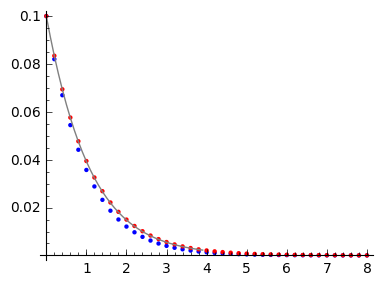

In [4]:
p0+p1+p2

In [5]:
var('c t')
X = function('X')(t)
desolve(diff(X,t)==f(X), X)

log(X(t) - 1) - log(X(t)) == _C + t

In [6]:
solve( (X - 1)/X == c*exp(t),X)

[X(t) == -1/(c*e^t - 1)]

In [7]:
solve( -1/(c*e^0 - 1)==0.1, c)

[c == -9]

In [8]:
plt_exact=plot( -1/(c*e^t - 1).subs(c==-9), (t,0,4),color='green',figsize=4)

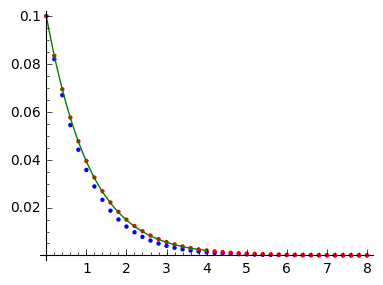

In [9]:
p1+p2+plt_exact

<h2>Praktyczne rozwiązywanie Równań Różniczkowych Zwyczajnych </h2>
<p>W systemie Sage istnieje kilka możliwości rozwiązywania równań różniczkowych zwyczajnych (i układów równań pierwszego rzędu).</p>

In [10]:
desolvers?

In [13]:
var('t')
x = function('x', t)
desolve(diff(x,t)==1+x^2, x)

arctan(x(t)) == _C + t

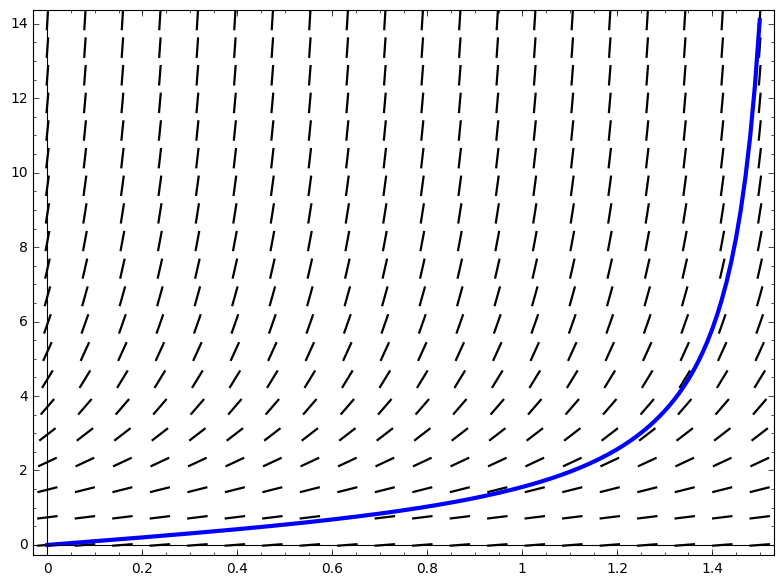

In [14]:
x,y=var('x y')
P=desolve_rk4(y^2+1,y,ics=[0,0],ivar=x,output='slope_field',end_points=1.5,step=0.01,thickness=3)
P

<h2>Metoda: desolve_odeint</h2>
<p>Metoda stosuje procedurę lsode z odepack (z <a href="http://www.netlib.org/odepack/" target="_blank">netlib</a>). </p>

\begin{eqnarray}
\frac{dx}{dt} &=& x(1-y)\\
\frac{dy}{dt} &=& -y(1-x)
\end{eqnarray}

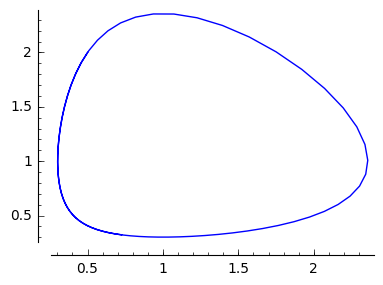

In [21]:
x,y = var('x,y')
f = [x*(1-y),-y*(1-x)]
tpkt = srange(0,10,0.1)
sol = desolve_odeint(f, [0.5,2],tpkt,[x,y])
p=line(zip(sol[:,0],sol[:,1]),figsize=4)
p

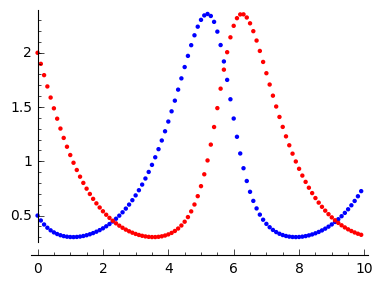

In [22]:
point(zip(tpkt,sol[:,0]),figsize=4)+\
 point(zip(tpkt,sol[:,1]),color='red')

In [23]:
sol.shape

(100, 2)

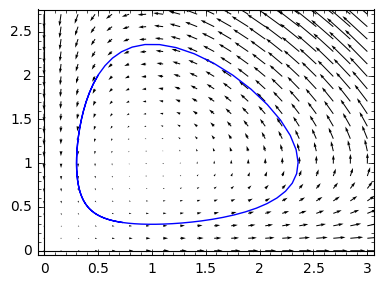

In [17]:
p+plot_vector_field(f,(x,0,3),(y,0,2.7))

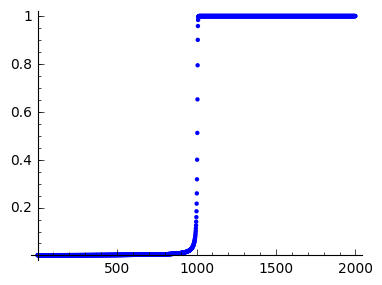

In [32]:
y = var('y')
epsilon = 0.001
f = y^2*(1-y)
ic = epsilon
t = srange(0,2/epsilon,1)
sol = desolve_odeint(f,ic,t,y ,rtol=1e-9,atol=1e-10,compute_jac=True)
p = points(zip(t,sol))
p.show(figsize=4)

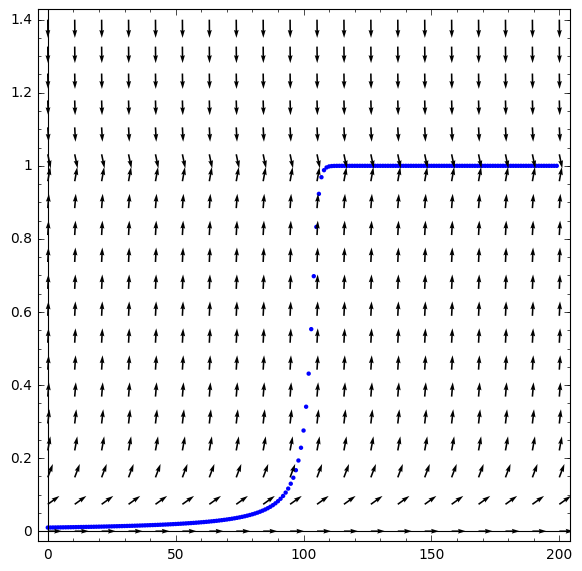

In [23]:
var('x y')
ratio=200/1.4
plot_vector_field([1,f],(x,0,200),(y,0,1.4),figsize=(6,6),aspect_ratio=ratio) + p

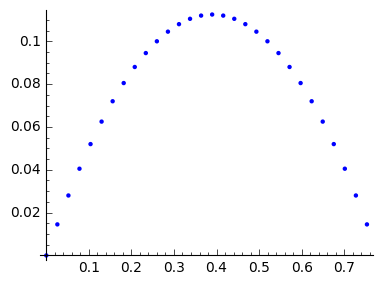

In [34]:
var('x,y,vx,vy')
f = [vx,vy,0.+0*x,-10.+0*x]
sol = desolve_odeint(f,[0.,0.,3*cos(30/180*pi),3*sin(30/180*pi)],srange(0,.3,0.01),[x,y,vx,vy])
p = point(zip(sol[:,0],sol[:,1]),figsize=4)
p

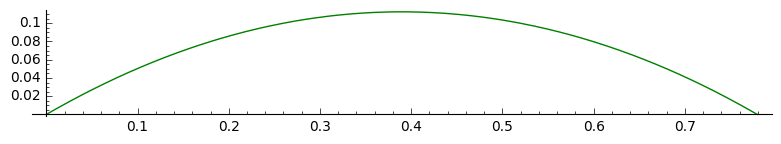

In [35]:
var('t')
plt_exact=parametric_plot( ( 3*cos(30/180*pi)*t,3*sin(30/180*pi)*t-10.0*t^2/2 ) , (t,0,2*3*sin(30/180*pi)/10 ) ,color='green') 
plt_exact

In [26]:
(2* 3*sin(30/180*pi)/10)

3/10

In [27]:
cos(30/180*pi)

1/2*sqrt(3)

4.50000000000000
4.59000000000000


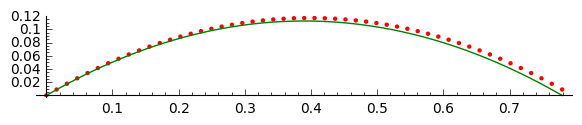

In [28]:
tend=.3
N=50.
dt=tend/N
x0,y0,vx0,vy0 = 0.,0.,3*cos(30/180*pi).n(),3*sin(30/180*pi).n()
print 0.5*(vx0^2+vy0^2) + 10*y0
traj=[[x0,y0,vx0,vy0]]
for i in range(N):
    x,y,vx,vy=x0+vx0*dt,y0+vy0*dt,vx0,vy0-10.*dt
    traj.append([x,y,vx,vy]) 
    x0,y0,vx0,vy0= x,y,vx,vy

plt_euler=point([(tr_[0],tr_[1]) for tr_ in traj],figsize=6,color='red')
print 0.5*(vx^2+vy^2) + 10*y
plt_euler+plt_exact

4.41000000000000


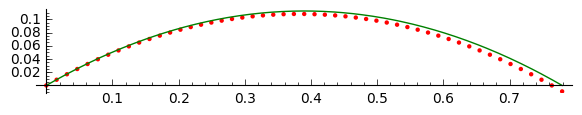

In [29]:
# Euler full implicit
tend=.3

dt=tend/N
x0,y0,vx0,vy0 = 0.,0.,3*cos(30/180*pi).n(),3*sin(30/180*pi).n()
traj=[[x0,y0,vx0,vy0]]
for i in range(N):
    x,y,vx,vy=x0+vx0*dt, -10*dt^2 + dt*vy0 + y0,vx0,vy0-10.*dt
    traj.append([x,y,vx,vy]) 
    x0,y0,vx0,vy0= x,y,vx,vy

plt_euler=point([(tr_[0],tr_[1]) for tr_ in traj],figsize=6,color='red')
print 0.5*(vx^2+vy^2)+y*10
plt_euler+plt_exact

In [30]:
var('x0,y0,vx0,vy0,x,y,vx,vy,dt')
solve( [x==x0+vx*dt,y==y0+vy*dt,vx==vx0,vy==vy0-10.*dt], [x,y,vx,vy] )

[[x == dt*vx0 + x0, y == -10*dt^2 + dt*vy0 + y0, vx == vx0, vy == -10*dt + vy0]]

4.50000000000000
4.50000000000000


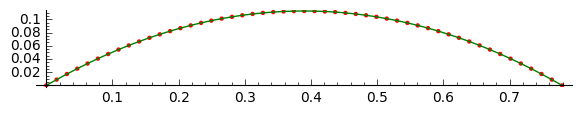

In [31]:
# Euler Cromer (semi-implicit z wagą 1/2)
tend=.3

dt=tend/N
x0,y0,vx0,vy0 = 0.,0.,3*cos(30/180*pi).n(),3*sin(30/180*pi).n()
print 0.5*(vx0^2+vy0^2)+y0*10
traj=[[x0,y0,vx0,vy0]]
for i in range(N):
    vx,vy = vx0,vy0-10.*dt
    x,y = x0+0.5*(vx+vx0)*dt,y0+0.5*(vy+vy0)*dt

    traj.append([x,y,vx,vy]) 
    x0,y0,vx0,vy0= x,y,vx,vy

plt_euler=point([(tr_[0],tr_[1]) for tr_ in traj],figsize=6,color='red')
print 0.5*(vx^2+vy^2)+y*10
plt_euler+plt_exact

0.628018000000000 0.628044455968610


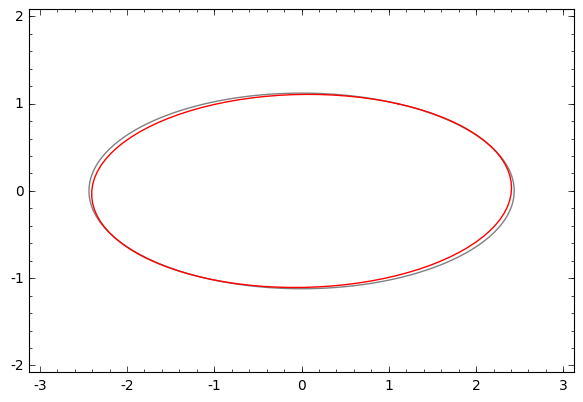

In [41]:
# Euler Cromer (semi-implicit) oscylator Harmoniczny - zachowanie energii
N=97

omega=0.46
tend=2*pi.n()/omega
dt=tend/N
x0,v0 = 1.1,1.
E0= 0.5*(v0^2+omega^2*x0^2)

traj=[[x0,v0]]
for i in range(N):
    v = v0-omega^2*x0*dt 
    x = x0+v*dt

    traj.append([x,v]) 
    x0,v0= x,v

plt_euler=line([(tr_[0],tr_[1]) for tr_ in traj],figsize=6,color='red')
print E0,0.5*(v^2+omega^2*x^2)


var('x,v')
plt_exact=implicit_plot( 0.5*(v^2+omega^2*x^2)==E0,(x,-3,3),(v,-2,2),color='grey' ) 
plt_euler+plt_exact

<h2>Ode_solver - GSL </h2>
<p><strong><a href="http://pl.wikipedia.org/wiki/GNU_Scientific_Library" target="_blank">GNU Scientific library</a></strong><span style="font-family: sans-serif; font-size: 13px; line-height: 19px;"> – <span style="font-family: sans-serif; font-size: 13px; line-height: 19px;"> </span><a style="text-decoration: none; color: #0b0080; background-image: none; font-family: sans-serif; font-size: 13px; line-height: 19px;" title="Biblioteka (informatyka)" href="http://pl.wikipedia.org/wiki/Biblioteka_(informatyka)">biblioteka</a><span style="font-family: sans-serif; font-size: 13px; line-height: 19px;"> funkcji obliczeniowych i naukowych dla </span><a style="text-decoration: none; color: #0b0080; background-image: none; font-family: sans-serif; font-size: 13px; line-height: 19px;" title="C (język programowania)" href="http://pl.wikipedia.org/wiki/C_(j%C4%99zyk_programowania)">C</a><span style="font-family: sans-serif; font-size: 13px; line-height: 19px;"> i </span><a style="text-decoration: none; color: #0b0080; background-image: none; font-family: sans-serif; font-size: 13px; line-height: 19px;" title="C++" href="http://pl.wikipedia.org/wiki/C%2B%2B">C++</a><span style="font-family: sans-serif; font-size: 13px; line-height: 19px;"> dostępna na zasadach </span><a style="text-decoration: none; color: #0b0080; background-image: none; font-family: sans-serif; font-size: 13px; line-height: 19px;" title="GNU General Public License" href="http://pl.wikipedia.org/wiki/GNU_General_Public_License">GPL</a><span style="font-family: sans-serif; font-size: 13px; line-height: 19px;">. Biblioteka jest częścią </span><a style="text-decoration: none; color: #0b0080; background-image: none; font-family: sans-serif; font-size: 13px; line-height: 19px;" title="GNU" href="http://pl.wikipedia.org/wiki/GNU">Projektu GNU</a><span style="font-family: sans-serif; font-size: 13px; line-height: 19px;">.</span> </span></p>

In [33]:
def f_1(t,Y):
    x,y=Y[0],Y[1]
    return [x*(1-y),-y*(1-x)]

T = ode_solver()
T.algorithm="rk4"
T.function=f_1
T.ode_solve(y_0=[0.5,2.0],t_span=[0,14],num_points=300)

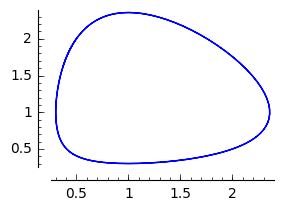

In [34]:
line( [x_[1] for x_ in T.solution] ,figsize=3)

<p>$dot v$ </p>